## About

This plot is an **animation** that displays the evolution of plastic production in the world between 1950 and 2050.

The chart was made by [Joseph B](https://www.barbierjoseph.com/) with [matplotlib](/matplotlib). Thanks to him for accepting sharing his work here!

Let's see what the final picture will look like:

![gif](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/animations/web-animated-line-chart-with-text.gif)


## Libraries

First, you need to load a whole bunch of libraries:


In [1]:
# data manipulation
import pandas as pd
import numpy as np

# make the charts
import matplotlib.pyplot as plt

# annotations
import textwrap
import math
import re
from matplotlib.ticker import FormatStrFormatter
from highlight_text import fig_text, ax_text
from matplotlib.patches import FancyArrowPatch
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties

# animation
from PIL import Image, ImageSequence
from matplotlib.animation import FuncAnimation

## Dataset

For this reproduction, we're going to retrieve the data directly from the gallery's Github repo. This means we just need to **give the right url as an argument** to pandas' `read_csv()` function to retrieve the data.

Then, we apply a few simple modifications to the data in order to have **1 row per year**, with 2 columns: the number of outer space object for the US and for the Russia.


In [2]:
# Open the dataset from Github
url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/global-plastics-production-interpolated.csv"
url = "../../../Small-Projects/plastic-pollution/global-plastics-production-interpolated.csv"
df = pd.read_csv(url)

#df.reset_index(inplace=True)
df['year'] = np.linspace(1950, 2050, 1001)
df.index = df['year']
df.drop(columns=['year'], inplace=True)
df.head()

,plastic-production
year,
1950.0,2.000000e+06
1950.1,2.010854e+06
1950.2,2.019297e+06
1950.3,2.025327e+06
1950.4,2.028945e+06


Now we have a dataset that fits perfectly the needs for this animation!


## Minimalist animation

To understand the basics of animation in matplotlib, refer to [this detailed guide](/340-scatterplot-animation) which provides a step-by-step tutorial on crafting a straightforward animation.

In our `update()` function, each frame represents a different year, emphasizing the **most recent year** to create a sense of a **continuous trajectory**.

Additionally, we modify the **background, annotations, and line colors**, and opt for a lower `dpi` to **decrease resolution**, enhancing the animation's creation speed.


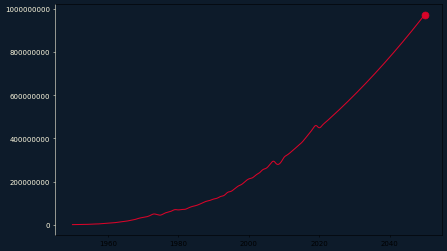

In [3]:
# parameters
background_color = '#0d1b2a'
text_color = '#fefae0'
line_color = '#d90429'
dpi = 50

# Setting up the plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=dpi)
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.tick_params(axis='y', colors=text_color)
ax.spines[['left']].set_color(text_color)

# Update function for the animation
def update(frame):

    # skip first frame
    if frame == 0:
        return None

    # initialize subset of data
    subset_df = df.iloc[:frame]
    ax.clear()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

    # create the line chart
    ax.plot(subset_df.index, subset_df['plastic-production'], color=line_color)
    ax.scatter(subset_df.index[-1], subset_df['plastic-production'].values[-1], color=line_color, s=100)

# create and save animation
path = '../../static/animations/web-animated-line-chart-with-text-1.gif'
ani = FuncAnimation(fig, update, frames=len(df))
ani.save(path, fps=5)

![gif](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/animations/web-animated-line-chart-with-text-1.gif)


## Custom axes and add dates

In this phase, we tailor the **chart's appearance** by:

- **eliminating the right, top, and bottom axes entirely**
- **modifying the y-scale to enhance visibility**

Additionally, we incorporate **reference dates** into the backdrop using the [**highlight_text package**](/advanced-custom-annotations-matplotlib). Notably, the year `1950` remains a **fixed point**, while we allow the **current date** to adjust dynamically.


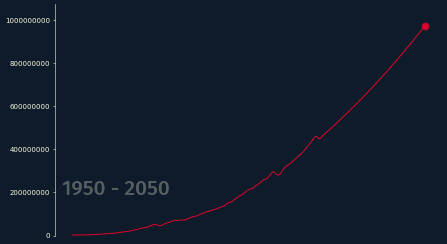

In [4]:
# parameters
background_color = '#0d1b2a'
text_color = '#fefae0'
line_color = '#d90429'
dpi = 50

# Setting up the plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=dpi)
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.tick_params(axis='y', colors=text_color)
ax.spines[['left']].set_color(text_color)

# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Light.ttf'
font = FontProperties(fname=font_path)
bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

# Update function for the animation
def update(frame):

    # skip first frame
    if frame == 0:
        return None

    # initialize subset of data
    subset_df = df.iloc[:frame]
    ax.clear()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

    # create the line chart
    ax.plot(subset_df.index, subset_df['plastic-production'], color=line_color)
    ax.scatter(subset_df.index[-1], subset_df['plastic-production'].values[-1], color=line_color, s=100)

    # date in the background
    year = df.index[frame]
    fig_text(
        0.14, 0.3,
        '1950 - ' + str(round(year)),
        ha='left', va='top',
        fontsize=30,
        font=bold_font,
        color=text_color,
        fontweight='bold',
        alpha=0.3,
        fig=fig
    )

    # custom axes
    y_min = df.iloc[:frame+1].sum(axis=1).min()
    y_max = df.iloc[:frame+1].sum(axis=1).max()
    ax.set_ylim(0, y_max*1.1)
    ax.spines[['top', 'right', 'bottom']].set_visible(False)
    ax.set_xticks([])

# create and save animation
path = '../../static/animations/web-animated-line-chart-with-text-2.gif'
ani = FuncAnimation(fig, update, frames=len(df))
ani.save(path, fps=5)

![gif](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/animations/web-animated-line-chart-with-text-2.gif)


## Add title and source

A visualization remains incomplete without a title. To enhance it, consider adding two key annotations:

- **Title**: Elevates the understanding and significance of the visualization.
- **Credit/Source**: Establishes credibility and acknowledges the original data or inspiration.

Both elements can be effectively incorporated using the [**highlight_text package**](/advanced-custom-annotations-matplotlib).


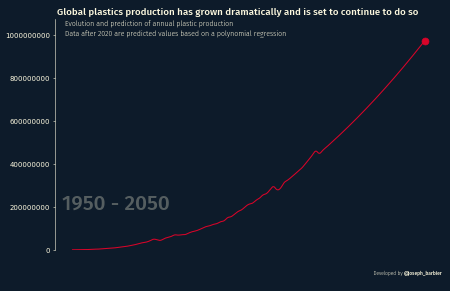

In [5]:
# parameters
background_color = '#0d1b2a'
text_color = '#fefae0'
line_color = '#d90429'
dpi = 50

# Setting up the plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=dpi)
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.tick_params(axis='y', colors=text_color)
ax.spines[['left']].set_color(text_color)

# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Light.ttf'
font = FontProperties(fname=font_path)
bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

# Update function for the animation
def update(frame):

    # skip first frame
    if frame == 0:
        return None

    # initialize subset of data
    subset_df = df.iloc[:frame]
    ax.clear()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

    # create the line chart
    ax.plot(subset_df.index, subset_df['plastic-production'], color=line_color)
    ax.scatter(subset_df.index[-1], subset_df['plastic-production'].values[-1], color=line_color, s=100)

    # date in the background
    year = df.index[frame]
    fig_text(
        0.14, 0.3,
        '1950 - ' + str(round(year)),
        ha='left', va='top',
        fontsize=30,
        font=bold_font,
        color=text_color,
        fontweight='bold',
        alpha=0.3,
        fig=fig
    )

    # custom axes
    y_min = df.iloc[:frame+1].sum(axis=1).min()
    y_max = df.iloc[:frame+1].sum(axis=1).max()
    ax.set_ylim(0, y_max*1.1)
    ax.spines[['top', 'right', 'bottom']].set_visible(False)
    ax.set_xticks([])

    # title
    text = """<Global plastics production has grown dramatically and is set to continue to do so>
    <Evolution and prediction of annual plastic production>
    <Data after 2020 are predicted values based on a polynomial regression>
    """
    fig_text(
        0.13, 0.92,
        text,
        ha='left', va='top',
        font=font,
        highlight_textprops=[
            {'color':text_color, 'fontsize':14, 'font':bold_font},
            {'color':text_color, 'fontsize':10},
            {'color':text_color, 'fontsize':10},
        ],
        fig=fig
    )

    # credit annotation
    text = """
    Developed by <@joseph_barbier>
    """
    fig_text(
        0.9, 0,
        text,
        ha='right', va='bottom',
        fontsize=7, font=font,
        color=text_color,
        highlight_textprops=[
            {'font':bold_font},
        ],
        fig=fig
    )

# create and save animation
path = '../../static/animations/web-animated-line-chart-with-text-3.gif'
ani = FuncAnimation(fig, update, frames=len(df))
ani.save(path, fps=20)

![gif](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/animations/web-animated-line-chart-with-text-3.gif)


## Text animation

**Displaying text in animations can present two main challenges:**

- **Determining which part of the text to show at each frame**: To address this, we **calculate the number of characters** to display incrementally with each frame. This method effectively creates the illusion that the text is **unfolding gradually** throughout the animation.

- **Applying varying styles to different parts of the text**: We tackle this by defining two functions. The first function removes any unpaired "<" symbols to ensure compatibility with the [**highlight_text package**](/advanced-custom-annotations-matplotlib), which utilizes "<>" to enclose strings. This preprocessing step is crucial, especially when the text isn't fully displayed in a frame. After preprocessing, we **count the enclosed strings** to correctly set the `highlight_textprops` argument, ensuring the right style and length are applied at each animation step.


In [6]:
def remove_unmatched_lt(text):
   """
   Remove unmatched '<' characters from text.

   Examples:

   text = '<hello world'
   remove_unmatched_lt(text)
   > 'hello world'

   text = 'hello <world>'
   remove_unmatched_lt(text)
   > 'hello <world>'
   """
   pattern = r'<(?![^<>]*>)'
   cleaned_text = re.sub(pattern, '', text)
   return cleaned_text

def count_closed_and_enclosed(text):
   """
   Count the number of closed and enclosed tags in text.

   Examples:

   text = '<hello world>'
   count_closed_and_enclosed(text)
   > 1

   text = '<hello> <world>'
   count_closed_and_enclosed(text)
   > 2
   """
   closed_pattern = r'<[^<>]*>'
   closed_tags = re.findall(closed_pattern, text)
   return len(closed_tags)

Also, to prevent the text from becoming **too lengthy** and to ensure **line breaks**, we use the `textwrap` module, which allows us to set a maximum number of characters per line.


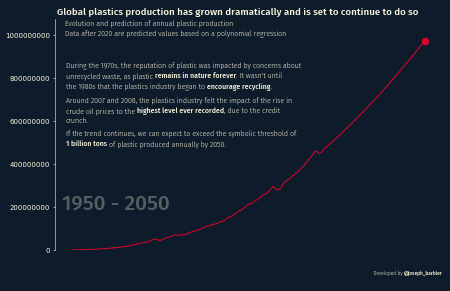

In [7]:
# parameters
background_color = '#0d1b2a'
text_color = '#fefae0'
line_color = '#d90429'
dpi = 50

# description
description = f"""
During the 1970s, the reputation of plastic was impacted by concerns about unrecycled waste, as plastic <remains in nature forever>. It wasn't until the 1980s that the plastics industry began to <encourage recycling>.

Around 2007 and 2008, the plastics industry felt the impact of the rise in crude oil prices to the <highest level ever recorded>, due to the credit crunch. 

If the trend continues, we can expect to exceed the symbolic threshold of <1 billion tons> of plastic produced annually by 2050.
"""

# Setting up the plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=dpi)
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.tick_params(axis='y', colors=text_color)
ax.spines[['left']].set_color(text_color)

# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Light.ttf'
font = FontProperties(fname=font_path)
bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

# Update function for the animation
def update(frame):

    # skip first frame
    if frame == 0:
        return None

    # initialize subset of data
    subset_df = df.iloc[:frame]
    ax.clear()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

    # create the line chart
    ax.plot(subset_df.index, subset_df['plastic-production'], color=line_color)
    ax.scatter(subset_df.index[-1], subset_df['plastic-production'].values[-1], color=line_color, s=100)

    # date in the background
    year = df.index[frame]
    fig_text(
        0.14, 0.3,
        '1950 - ' + str(round(year)),
        ha='left', va='top',
        fontsize=30,
        font=bold_font,
        color=text_color,
        fontweight='bold',
        alpha=0.3,
        fig=fig
    )

    # custom axes
    y_min = df.iloc[:frame+1].sum(axis=1).min()
    y_max = df.iloc[:frame+1].sum(axis=1).max()
    ax.set_ylim(0, y_max*1.1)
    ax.spines[['top', 'right', 'bottom']].set_visible(False)
    ax.set_xticks([])

    # title
    text = """<Global plastics production has grown dramatically and is set to continue to do so>
    <Evolution and prediction of annual plastic production>
    <Data after 2020 are predicted values based on a polynomial regression>
    """
    fig_text(
        0.13, 0.92,
        text,
        ha='left', va='top',
        font=font,
        highlight_textprops=[
            {'color':text_color, 'fontsize':14, 'font':bold_font},
            {'color':text_color, 'fontsize':10},
            {'color':text_color, 'fontsize':10},
        ],
        fig=fig
    )

    # credit annotation
    text = """
    Developed by <@joseph_barbier>
    """
    fig_text(
        0.9, 0,
        text,
        ha='right', va='bottom',
        fontsize=7, font=font,
        color=text_color,
        highlight_textprops=[
            {'font':bold_font},
        ],
        fig=fig
    )

    # get text to display at current frame
    total_chars = len(description)
    effective_frame_count = len(df) - 80 # text ends 80 frames before the video's end
    num_chars = math.ceil(total_chars * (frame / effective_frame_count)) if frame < effective_frame_count else total_chars
    current_description = description[:num_chars]
    current_description = remove_unmatched_lt(current_description) # remove unmatched '<' characters
    num_closed_tags = count_closed_and_enclosed(current_description) # count number of closed tags
    if num_closed_tags > 0:
        highlight_textprops = [{'font':bold_font} for _ in range(num_closed_tags)]
    else:
        highlight_textprops = None
    wrapped_text = '\n'.join([textwrap.fill(paragraph, width=75) for paragraph in current_description.split('\n')])
    fig_text(
        0.147, 0.75,
        wrapped_text,
        ha='left', va='top',
        fontsize=10,
        font=font,
        color=text_color,
        highlight_textprops=highlight_textprops,
        fig=fig
    )

# create and save animation
path = '../../static/animations/web-animated-line-chart-with-text-4.gif'
ani = FuncAnimation(fig, update, frames=len(df))
ani.save(path, fps=5)

![gif](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/animations/web-animated-line-chart-with-text-4.gif)


## Highlight events + small changes

Now that we have a solid foundation, let's enhance our graphic with storytelling elements.

- We **align the title, subtitle, and description** in the top left corner.
- Add the **value next to the final date** point using the `scatter()` function.
- Include **two transparent rectangles** to highlight areas with notable fluctuations over the period. Use the `axvspan()` function and adjust the `alpha` parameter for transparency. Ensure they appear **only after a specific year** by incorporating an `if` statement.
- Add **two arrows** (refer to the `draw_arrow()` function below) and a small text **for the last frame** to indicate the period of the predicted data.


In [8]:
def remove_unmatched_lt(text):
    pattern = r'<(?![^<>]*>)'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

def count_closed_and_enclosed(text):
    closed_pattern = r'<[^<>]*>'
    closed_tags = re.findall(closed_pattern, text)
    return len(closed_tags)

def custom_formatter(x, pos):
    if x >= 1e6:
        return f'{x*1e-6:.0f}M'
    elif x >= 1e3:
        return f'{x*1e-3:.0f}k'
    else:
        return f'{x:.0f}'

def draw_arrow(tail_position, head_position, invert=False, radius=0.5):
    kw = dict(arrowstyle="Simple, tail_width=0.5, head_width=4, head_length=8", color=text_color, lw=0.5)
    if invert:
        connectionstyle = f"arc3,rad=-{radius}"
    else:
        connectionstyle = f"arc3,rad={radius}"
    a = FancyArrowPatch(
        tail_position, head_position,
        connectionstyle=connectionstyle,
        transform=fig.transFigure,
        **kw
    )
    fig.patches.append(a)

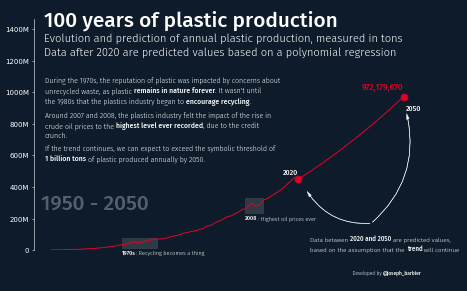

In [9]:
# parameters
background_color = '#0d1b2a'
text_color = 'white'
line_color = '#d90429'
dpi = 50

# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Light.ttf'
font = FontProperties(fname=font_path)
bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

# description
description = f"""
During the 1970s, the reputation of plastic was impacted by concerns about unrecycled waste, as plastic <remains in nature forever>. It wasn't until the 1980s that the plastics industry began to <encourage recycling>.

Around 2007 and 2008, the plastics industry felt the impact of the rise in crude oil prices to the <highest level ever recorded>, due to the credit crunch. 

If the trend continues, we can expect to exceed the symbolic threshold of <1 billion tons> of plastic produced annually by 2050.
"""

# Setting up the plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=dpi)
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.tick_params(axis='y', colors=text_color)
ax.spines[['left']].set_color(text_color)

# Calculate y-values for the 1970s period
y_1970s = df.loc[1970:1980, 'plastic-production']
ymin_1970s = y_1970s.min()
ymax_1970s = y_1970s.max()

# Calculate y-values for the 2005-2010 period
y_2005_2010 = df.loc[2005:2010, 'plastic-production']
ymin_2005_2010 = y_2005_2010.min()
ymax_2005_2010 = y_2005_2010.max()

# Update function for the animation
def update(frame):

    # skip first frame
    if frame == 0:
        return None

    # initialize subset of data
    subset_df = df.iloc[:frame]
    year = df.index[frame]
    ax.clear()

    # create the line chart
    ax.plot(subset_df.index, subset_df['plastic-production'], color=line_color)
    ax.scatter(subset_df.index[-1], subset_df['plastic-production'].values[-1], color=line_color, s=100)

    # highlight the 70s
    if year >= 1980:
        rect = ax.axvspan(
            1970, 1980,
            ymin=ymin_1970s*0.3 / subset_df['plastic-production'].max(),
            ymax=ymax_1970s*0.7 / subset_df['plastic-production'].max(),
            color='grey', alpha=0.3,
            zorder=-1
        )
        ax_text(
            1970, ymax_1970s*0.01,
            '<1970s>: Recycling becomes a thing',
            fontsize=8,
            color=text_color,
            ha='left',
            va='top',
            font=font,
            highlight_textprops=[{'font':bold_font}],
            ax=ax
        )

    # highlight the 2005-2010 period
    if year >= 2010:
        rect = ax.axvspan(
            2005, 2010,
            ymin=ymin_2005_2010*0.6 / subset_df['plastic-production'].max(),
            ymax=ymax_2005_2010*0.7 / subset_df['plastic-production'].max(),
            color='grey', alpha=0.3,
            zorder=-1
        )
        ax_text(
            2005, ymax_2005_2010*0.7,
            '<2008>: Highest oil prices ever',
            fontsize=8,
            color=text_color,
            ha='left',
            va='top',
            font=font,
            highlight_textprops=[{'font':bold_font}],
            ax=ax
        )

    # annotate the last point
    ax_text(
        subset_df.index[-1],
        subset_df['plastic-production'].values[-1]*1.06,
        f"{subset_df['plastic-production'].values[-1]:,.0f}",
        color=line_color,
        fontsize=12,
        ha='right',
        va='center',
        fontproperties=bold_font,
        ax=ax
    )

    # date in the background
    fig_text(
        0.14, 0.3,
        '1950 - ' + str(round(year)),
        ha='left', va='top',
        fontsize=30,
        font=bold_font,
        color=text_color,
        fontweight='bold',
        alpha=0.3,
        fig=fig
    )

    # custom axes
    y_min = df.iloc[:frame+1].sum(axis=1).min()
    y_max = df.iloc[:frame+1].sum(axis=1).max()
    ax.set_ylim(0, y_max*1.5)
    ax.spines[['top', 'right', 'bottom']].set_visible(False)
    ax.set_xticks([])
    ax.yaxis.set_major_formatter(FuncFormatter(custom_formatter))

    # get text to display at current frame
    total_chars = len(description)
    effective_frame_count = len(df) - 80 # ends 80 frames before the end
    num_chars = math.ceil(total_chars * (frame / effective_frame_count)) if frame < effective_frame_count else total_chars
    current_description = description[:num_chars]
    current_description = remove_unmatched_lt(current_description)
    num_closed_tags = count_closed_and_enclosed(current_description)
    if num_closed_tags > 0:
        highlight_textprops = [{'font':bold_font} for _ in range(num_closed_tags)]
    else:
        highlight_textprops = None
    wrapped_text = '\n'.join([textwrap.fill(paragraph, width=75) for paragraph in current_description.split('\n')])
    fig_text(
        0.147, 0.7,
        wrapped_text,
        ha='left', va='top',
        fontsize=10,
        font=font,
        color=text_color,
        highlight_textprops=highlight_textprops,
        fig=fig
    )

    # highlight the 2020
    if year >= 2020:
        ax.scatter(2020, df.loc[2020, 'plastic-production'], color=line_color, s=100)
        ax_text(
            2020, df.loc[2020, 'plastic-production']*1.1,
            "2020",
            color=text_color,
            fontsize=10,
            ha='right',
            va='center',
            fontproperties=bold_font,
            ax=ax
        )

    # highlight the 2050
    if year >= 2050:
        ax_text(
            2055, df.loc[2050, 'plastic-production']*0.92,
            "2050",
            color=text_color,
            fontsize=10,
            ha='right',
            va='center',
            fontproperties=bold_font,
            ax=ax
        )

    # draw arrow on last frame
    if frame == len(df) - 1:
        draw_arrow((0.8, 0.2), (0.67, 0.31), radius=0.3, invert=True)
        draw_arrow((0.8, 0.2), (0.87, 0.57), radius=0.3)

        text = """
        Data between <2020 and 2050> are predicted values,
        based on the assumption that the <trend> will continue
        """
        fig_text(
            0.65, 0.17,
            text,
            ha='left', va='top',
            fontsize=9,
            font=font,
            color=text_color,
            highlight_textprops=[
                {'font':bold_font},
                {'font':bold_font}
            ],
            fig=fig
        )

    # title
    text = """
    <100 years of plastic production>
    <Evolution and prediction of annual plastic production, measured in tons>
    <Data after 2020 are predicted values based on a polynomial regression>
    """
    fig_text(
        0.13, 0.92,
        text,
        ha='left', va='top',
        font=font,
        highlight_textprops=[
            {'color':text_color, 'fontsize':30, 'font':bold_font},
            {'color':text_color, 'fontsize':16},
            {'color':text_color, 'fontsize':16},
        ],
        fig=fig
    )

    # credit annotation
    text = """
    Developed by <@joseph_barbier>
    """
    fig_text(
        0.9, 0,
        text,
        ha='right', va='bottom',
        fontsize=7, font=font,
        color=text_color,
        highlight_textprops=[
            {'font':bold_font},
        ],
        fig=fig
    )

# create and save animation
ani = FuncAnimation(fig, update, frames=len(df))
path = '../../static/animations/web-animated-line-chart-with-text-5.gif'
ani.save(path, fps=5)

![gif](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/animations/web-animated-line-chart-with-text-5.gif)


## Final animation

The last step is for customizing the length and the resolution of our animation.

First, we change the value of the `dpi` argument to a larger one (200 is enough in most cases).

Then, we:

1. **Open the Image**

2. **Extract Frames**: extract all the frames from the GIF and makes copies of them.

3. **Set Frame Duration**: For each frame, we set how long the frame should be displayed. All frames get the same initial duration, except the last frame, which is set to stay longer (10 seconds).

4. **Save the New GIF**: Finally, we save these modified frames back into a new GIF file, keeping all frames and setting it to loop forever.

The code now requires a few minutes to execute but results in a significantly improved and more visually appealing animation!


In [10]:
def remove_unmatched_lt(text):
    pattern = r'<(?![^<>]*>)'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

def count_closed_and_enclosed(text):
    closed_pattern = r'<[^<>]*>'
    closed_tags = re.findall(closed_pattern, text)
    return len(closed_tags)

def custom_formatter(x, pos):
    if x >= 1e6:
        return f'{x*1e-6:.0f}M'
    elif x >= 1e3:
        return f'{x*1e-3:.0f}k'
    else:
        return f'{x:.0f}'

def draw_arrow(tail_position, head_position, invert=False, radius=0.5):
    kw = dict(arrowstyle="Simple, tail_width=0.5, head_width=4, head_length=8", color=text_color, lw=0.5)
    if invert:
        connectionstyle = f"arc3,rad=-{radius}"
    else:
        connectionstyle = f"arc3,rad={radius}"
    a = FancyArrowPatch(
        tail_position, head_position,
        connectionstyle=connectionstyle,
        transform=fig.transFigure,
        **kw
    )
    fig.patches.append(a)

Original animation finished
Final animation finished!


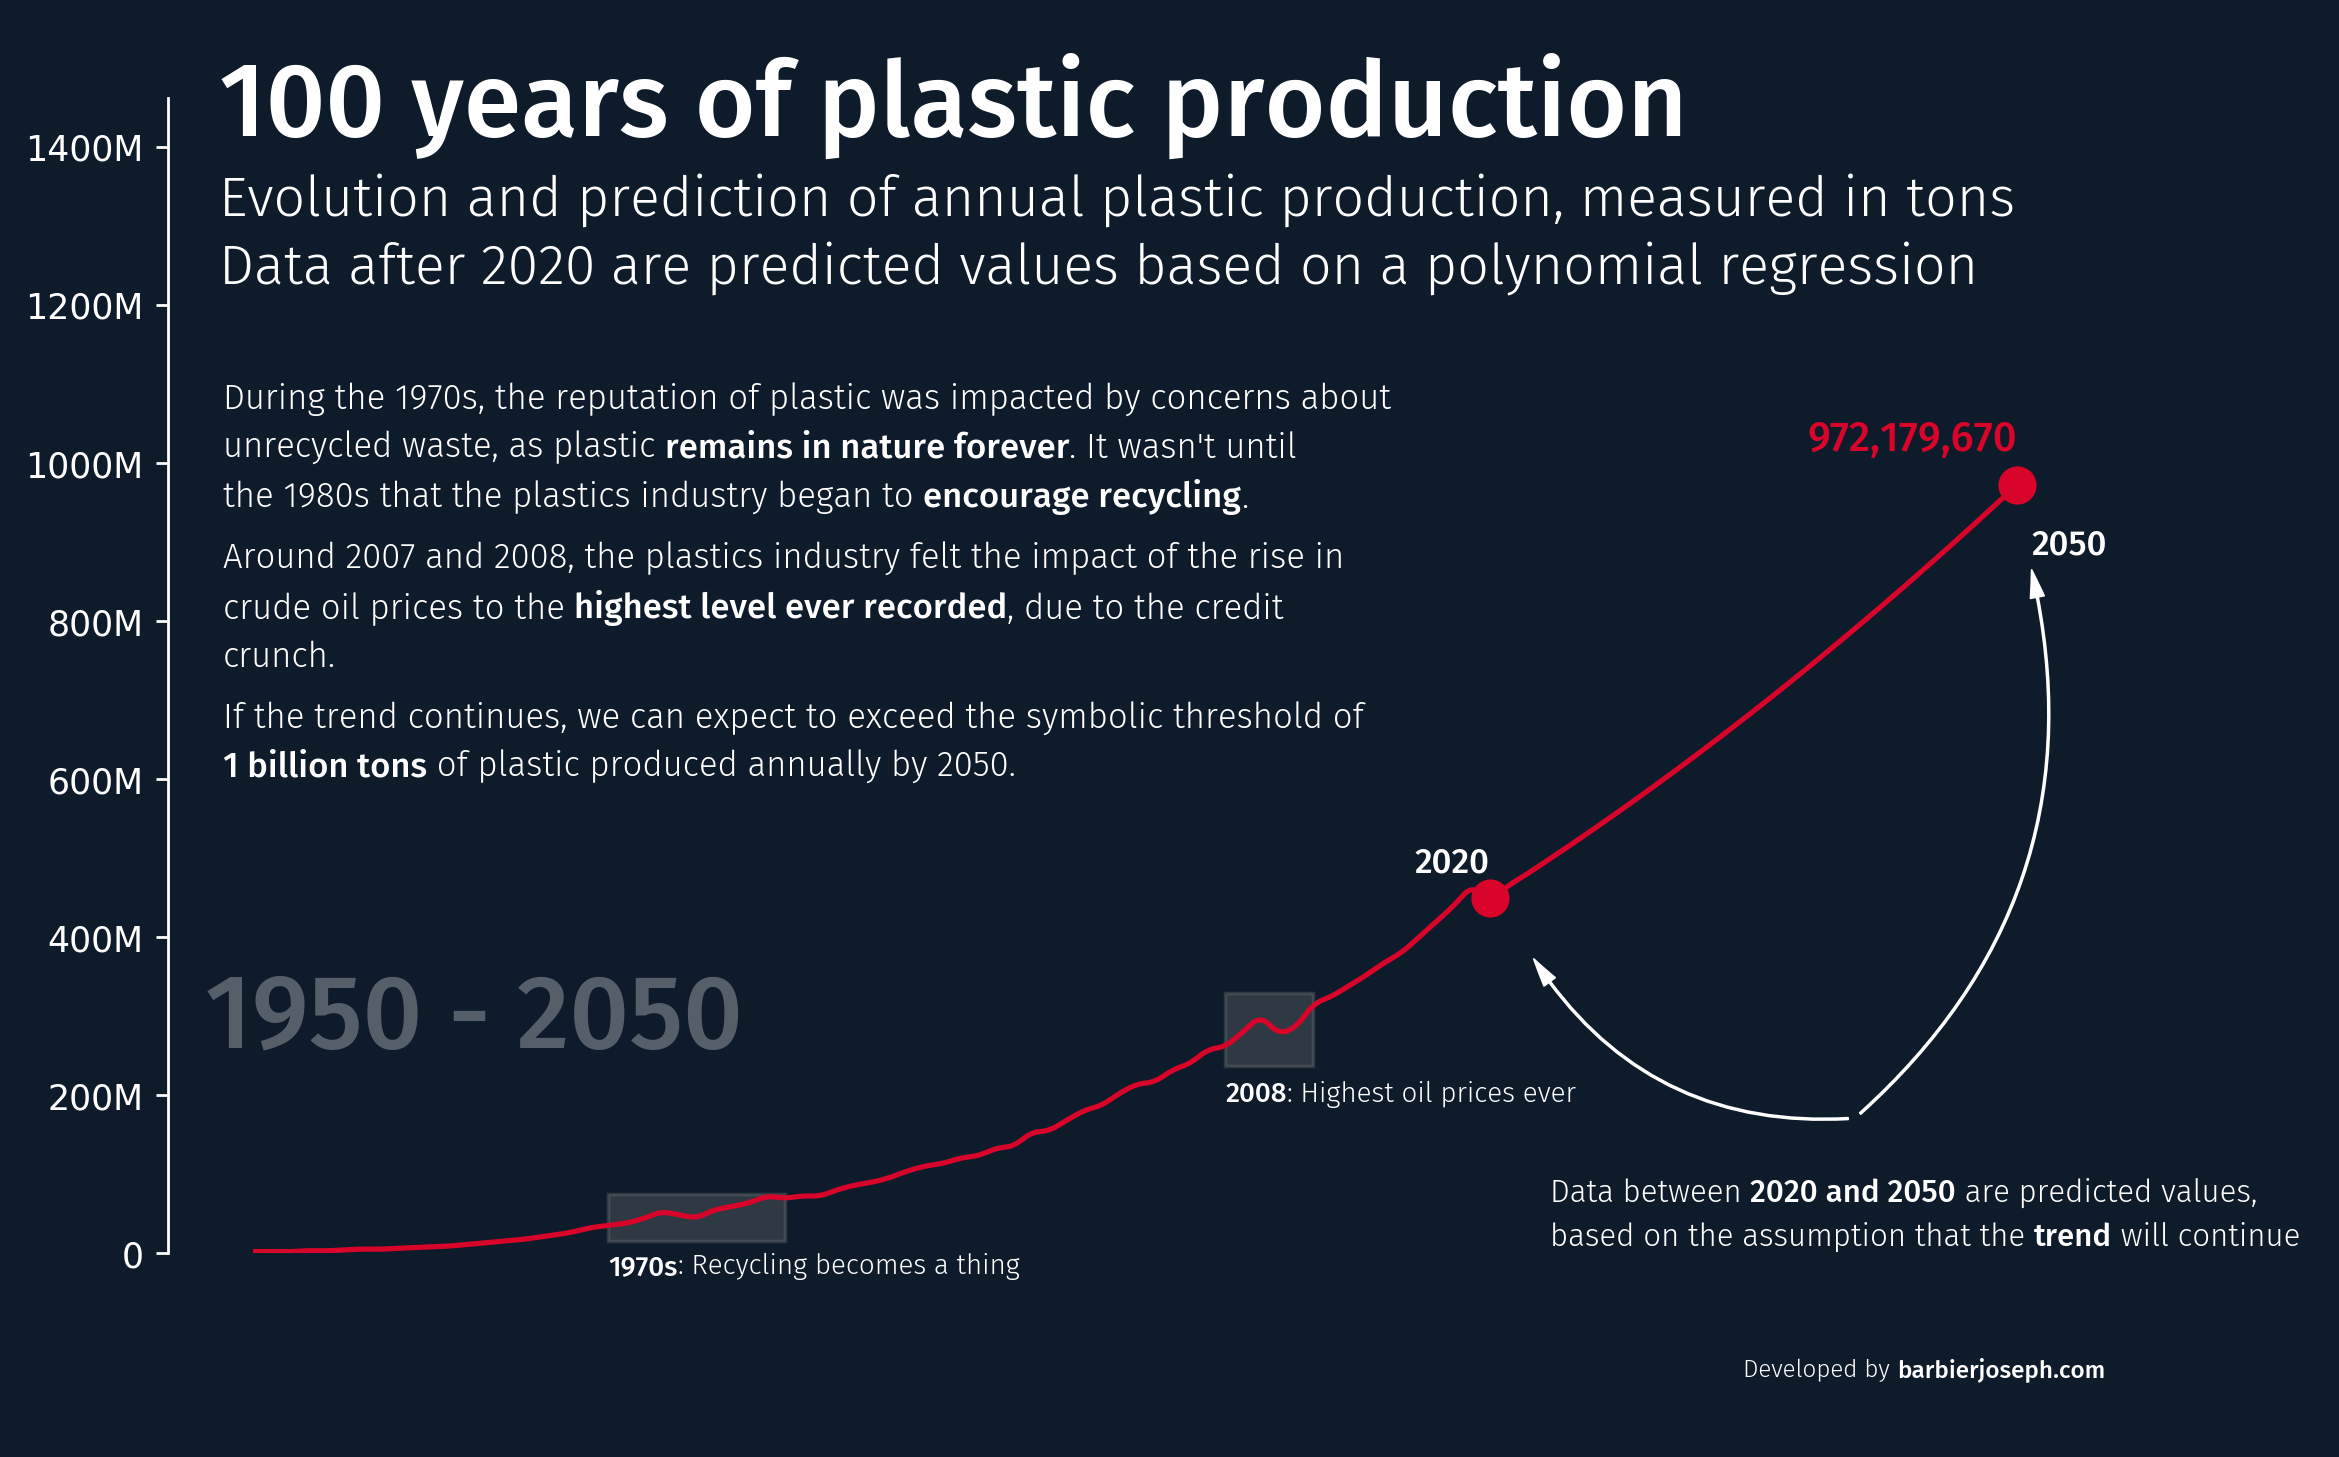

In [12]:
# parameters
background_color = '#0d1b2a'
text_color = 'white'
line_color = '#d90429'
dpi = 250
initial_duration = 25

# font
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'FiraSans-Light.ttf'
font = FontProperties(fname=font_path)
bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

# description
description = f"""
During the 1970s, the reputation of plastic was impacted by concerns about unrecycled waste, as plastic <remains in nature forever>. It wasn't until the 1980s that the plastics industry began to <encourage recycling>.

Around 2007 and 2008, the plastics industry felt the impact of the rise in crude oil prices to the <highest level ever recorded>, due to the credit crunch. 

If the trend continues, we can expect to exceed the symbolic threshold of <1 billion tons> of plastic produced annually by 2050.
"""

# Setting up the plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=dpi)
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.tick_params(axis='y', colors=text_color)
ax.spines[['left']].set_color(text_color)

# Calculate y-values for the 1970s period
y_1970s = df.loc[1970:1980, 'plastic-production']
ymin_1970s = y_1970s.min()
ymax_1970s = y_1970s.max()

# Calculate y-values for the 2005-2010 period
y_2005_2010 = df.loc[2005:2010, 'plastic-production']
ymin_2005_2010 = y_2005_2010.min()
ymax_2005_2010 = y_2005_2010.max()

# Update function for the animation
def update(frame):

    # skip first frame
    if frame == 0:
        return None

    # initialize subset of data
    subset_df = df.iloc[:frame]
    year = df.index[frame]
    ax.clear()

    # create the line chart
    ax.plot(subset_df.index, subset_df['plastic-production'], color=line_color)
    ax.scatter(subset_df.index[-1], subset_df['plastic-production'].values[-1], color=line_color, s=100)

    # highlight the 70s
    if year >= 1980:
        rect = ax.axvspan(
            1970, 1980,
            ymin=ymin_1970s*0.3 / subset_df['plastic-production'].max(),
            ymax=ymax_1970s*0.7 / subset_df['plastic-production'].max(),
            color='grey', alpha=0.3,
            zorder=-1
        )
        ax_text(
            1970, ymax_1970s*0.01,
            '<1970s>: Recycling becomes a thing',
            fontsize=8,
            color=text_color,
            ha='left',
            va='top',
            font=font,
            highlight_textprops=[{'font':bold_font}],
            ax=ax
        )

    # highlight the 2005-2010 period
    if year >= 2010:
        rect = ax.axvspan(
            2005, 2010,
            ymin=ymin_2005_2010*0.6 / subset_df['plastic-production'].max(),
            ymax=ymax_2005_2010*0.7 / subset_df['plastic-production'].max(),
            color='grey', alpha=0.3,
            zorder=-1
        )
        ax_text(
            2005, ymax_2005_2010*0.7,
            '<2008>: Highest oil prices ever',
            fontsize=8,
            color=text_color,
            ha='left',
            va='top',
            font=font,
            highlight_textprops=[{'font':bold_font}],
            ax=ax
        )

    # annotate the last point
    ax_text(
        subset_df.index[-1],
        subset_df['plastic-production'].values[-1]*1.06,
        f"{subset_df['plastic-production'].values[-1]:,.0f}",
        color=line_color,
        fontsize=12,
        ha='right',
        va='center',
        fontproperties=bold_font,
        ax=ax
    )

    # date in the background
    fig_text(
        0.14, 0.3,
        '1950 - ' + str(round(year)),
        ha='left', va='top',
        fontsize=30,
        font=bold_font,
        color=text_color,
        fontweight='bold',
        alpha=0.3,
        fig=fig
    )

    # custom axes
    y_min = df.iloc[:frame+1].sum(axis=1).min()
    y_max = df.iloc[:frame+1].sum(axis=1).max()
    ax.set_ylim(0, y_max*1.5)
    ax.spines[['top', 'right', 'bottom']].set_visible(False)
    ax.set_xticks([])
    ax.yaxis.set_major_formatter(FuncFormatter(custom_formatter))

    # get text to display at current frame
    total_chars = len(description)
    effective_frame_count = len(df) - 80 # ends 80 frames before the end
    num_chars = math.ceil(total_chars * (frame / effective_frame_count)) if frame < effective_frame_count else total_chars
    current_description = description[:num_chars]
    current_description = remove_unmatched_lt(current_description)
    num_closed_tags = count_closed_and_enclosed(current_description)
    if num_closed_tags > 0:
        highlight_textprops = [{'font':bold_font} for _ in range(num_closed_tags)]
    else:
        highlight_textprops = None
    wrapped_text = '\n'.join([textwrap.fill(paragraph, width=75) for paragraph in current_description.split('\n')])
    fig_text(
        0.147, 0.7,
        wrapped_text,
        ha='left', va='top',
        fontsize=10,
        font=font,
        color=text_color,
        highlight_textprops=highlight_textprops,
        fig=fig
    )

    # highlight the 2020
    if year >= 2020:
        ax.scatter(2020, df.loc[2020, 'plastic-production'], color=line_color, s=100)
        ax_text(
            2020, df.loc[2020, 'plastic-production']*1.1,
            "2020",
            color=text_color,
            fontsize=10,
            ha='right',
            va='center',
            fontproperties=bold_font,
            ax=ax
        )

    # highlight the 2050
    if year >= 2050:
        ax_text(
            2055, df.loc[2050, 'plastic-production']*0.92,
            "2050",
            color=text_color,
            fontsize=10,
            ha='right',
            va='center',
            fontproperties=bold_font,
            ax=ax
        )

    # draw arrow on last frame
    if frame == len(df) - 1:
        draw_arrow((0.8, 0.2), (0.67, 0.31), radius=0.3, invert=True)
        draw_arrow((0.8, 0.2), (0.87, 0.57), radius=0.3)

        text = """
        Data between <2020 and 2050> are predicted values,
        based on the assumption that the <trend> will continue
        """
        fig_text(
            0.65, 0.17,
            text,
            ha='left', va='top',
            fontsize=9,
            font=font,
            color=text_color,
            highlight_textprops=[
                {'font':bold_font},
                {'font':bold_font}
            ],
            fig=fig
        )

    # title
    text = """
    <100 years of plastic production>
    <Evolution and prediction of annual plastic production, measured in tons>
    <Data after 2020 are predicted values based on a polynomial regression>
    """
    fig_text(
        0.13, 0.92,
        text,
        ha='left', va='top',
        font=font,
        highlight_textprops=[
            {'color':text_color, 'fontsize':30, 'font':bold_font},
            {'color':text_color, 'fontsize':16},
            {'color':text_color, 'fontsize':16},
        ],
        fig=fig
    )

    # credit annotation
    text = """
    Developed by <barbierjoseph.com>
    """
    fig_text(
        0.9, 0,
        text,
        ha='right', va='bottom',
        fontsize=7, font=font,
        color=text_color,
        highlight_textprops=[
            {'font':bold_font},
        ],
        fig=fig
    )

# create and save animation
path = '../../static/animations/web-animated-line-chart-with-text-6.gif'
ani = FuncAnimation(fig, update, frames=len(df))
ani.save(path, fps=20)
print('Original animation finished')


# get initial frames
with Image.open(path) as img:
    frames = [frame.copy() for frame in ImageSequence.Iterator(img)]

# set duration of each frame
for i, frame in enumerate(frames):
    frame_duration = initial_duration

    # stay for last date
    if i == len(frames) - 1:
        frame_duration = 20000 # 20000
    frame.info['duration'] = frame_duration

# Save the modified frames as a new GIF
frames[0].save(path, save_all=True, append_images=frames[1:], loop=0)
print('Final animation finished!')

![gif](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/animations/web-animated-line-chart-with-text-6.gif)


## Going further

This article explains how to reproduce **an animation** that displays the number of outer space objects launched by the US and Russia over the years. The animation is enriched with **annotations** that highlight important events and a text that appears throughout the animation.

You might be interested in

- the [stacked area section](/stacked-area-plot)
- the [animation section](/animation)
